# Une technique sous-estimée pour créer de meilleurs graphiques de données

In [ ]:
!pip install scienceplots

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import scienceplots

In [2]:
plt.style.reload_library()
plt.style.use(['fast', 'seaborn-v0_8-notebook'])
plt.rcParams.update({'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'axes.titlesize': 20
                    })

plt.rcParams['figure.dpi'] = 300

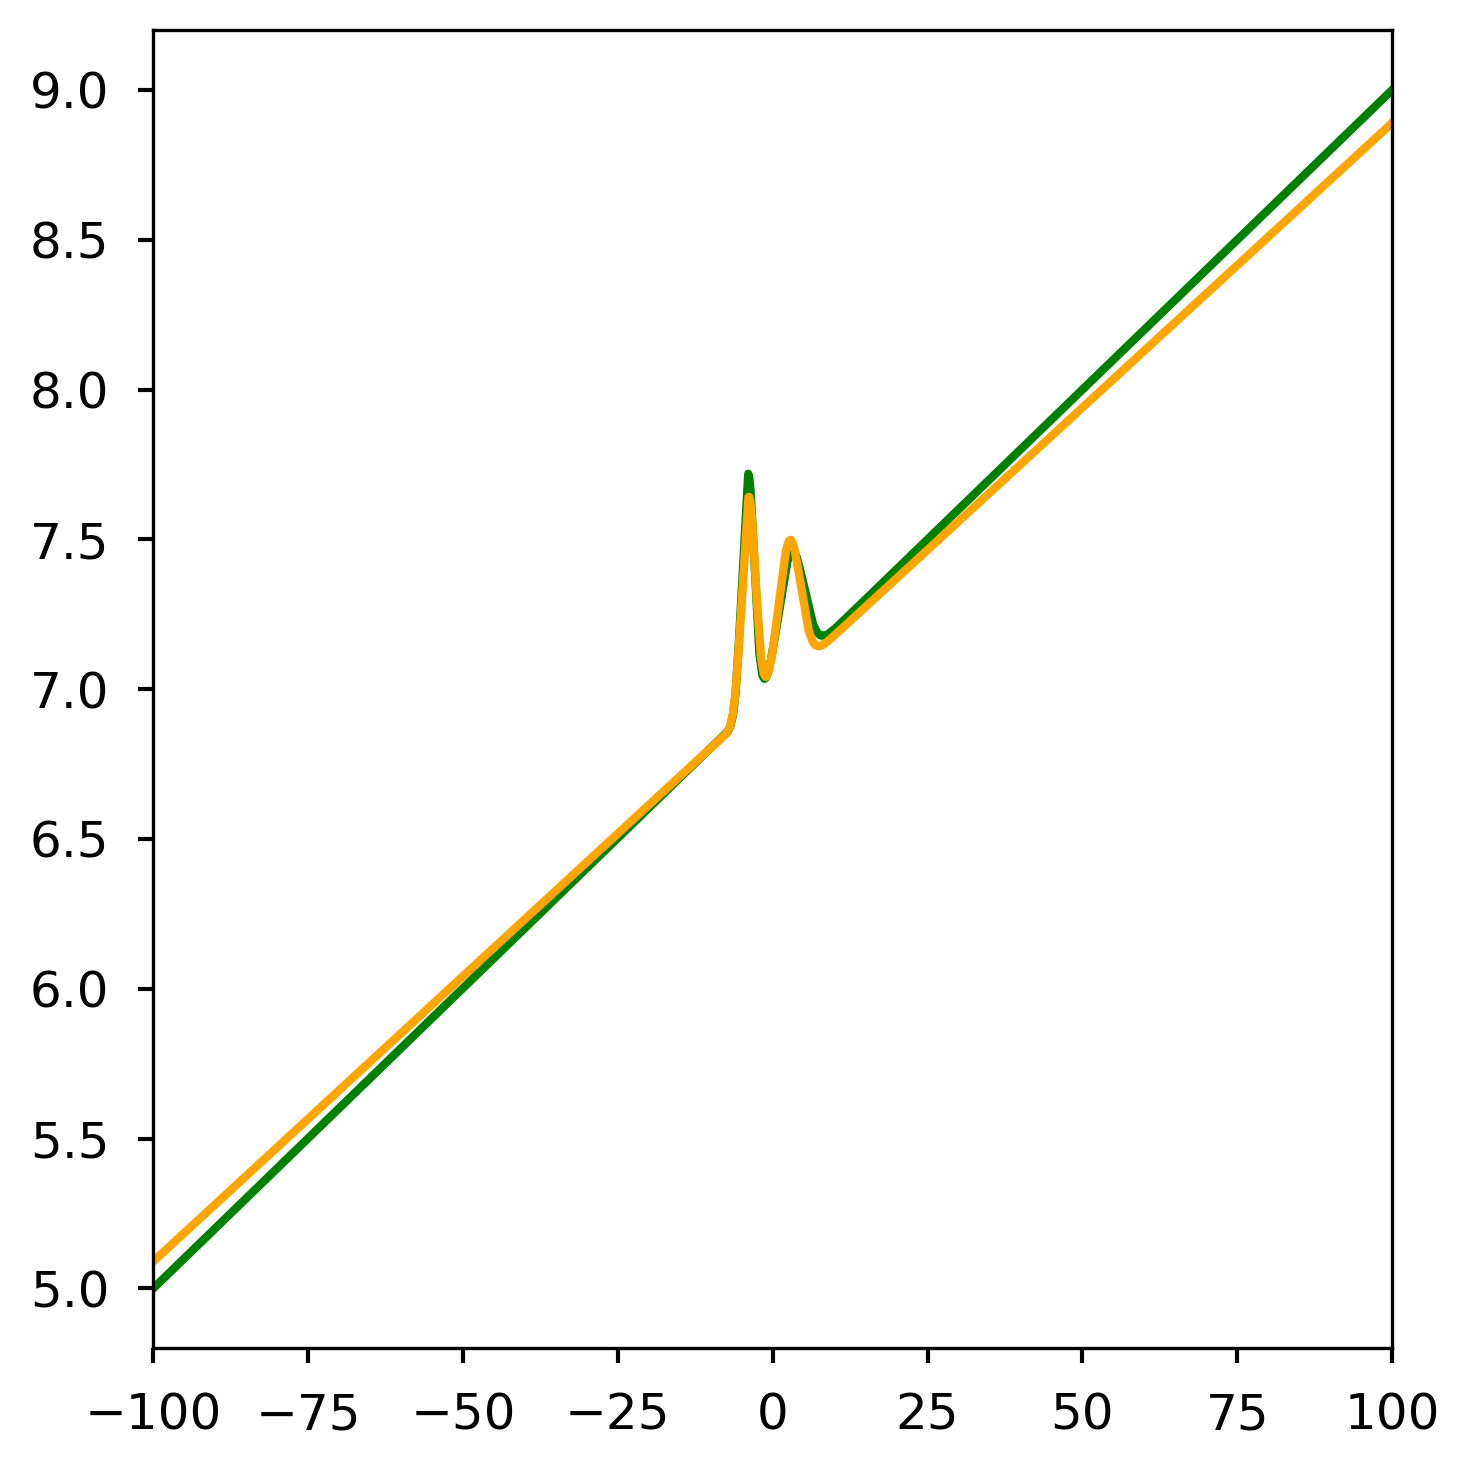

In [3]:
def calculate_noisy_line(grad, intcpt, mean_1, scale_1, mean_2, scale_2):

    xs = np.linspace(-100, 100, 5001)

    ys = grad * xs + intcpt + 6

    noise = 2*norm.pdf(xs, mean_1,  scale_1) + 2*norm.pdf(xs, mean_2, scale_2)

    return xs, ys + noise

def plot_noisy_line(axis, grad, intcpt, mean_1, scale_1, mean_2, scale_2, color):
    xs, ys = calculate_noisy_line(grad, intcpt, mean_1, scale_1, mean_2, scale_2)
    axis.plot(xs, ys, c=color, linewidth=2)

def plot_noisy_lines(axis):
    plot_noisy_line(axis, 0.02, 1, -4, 1, 3, 2, 'g')
    plot_noisy_line(axis, 0.019, 0.99, -3.9, 1.1, 2.7, 1.75, 'orange')
    
def plot_original(axis):
    plot_noisy_lines(axis)
    axis.set_xlim(-100, 100)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_original(axis)
plt.tight_layout()

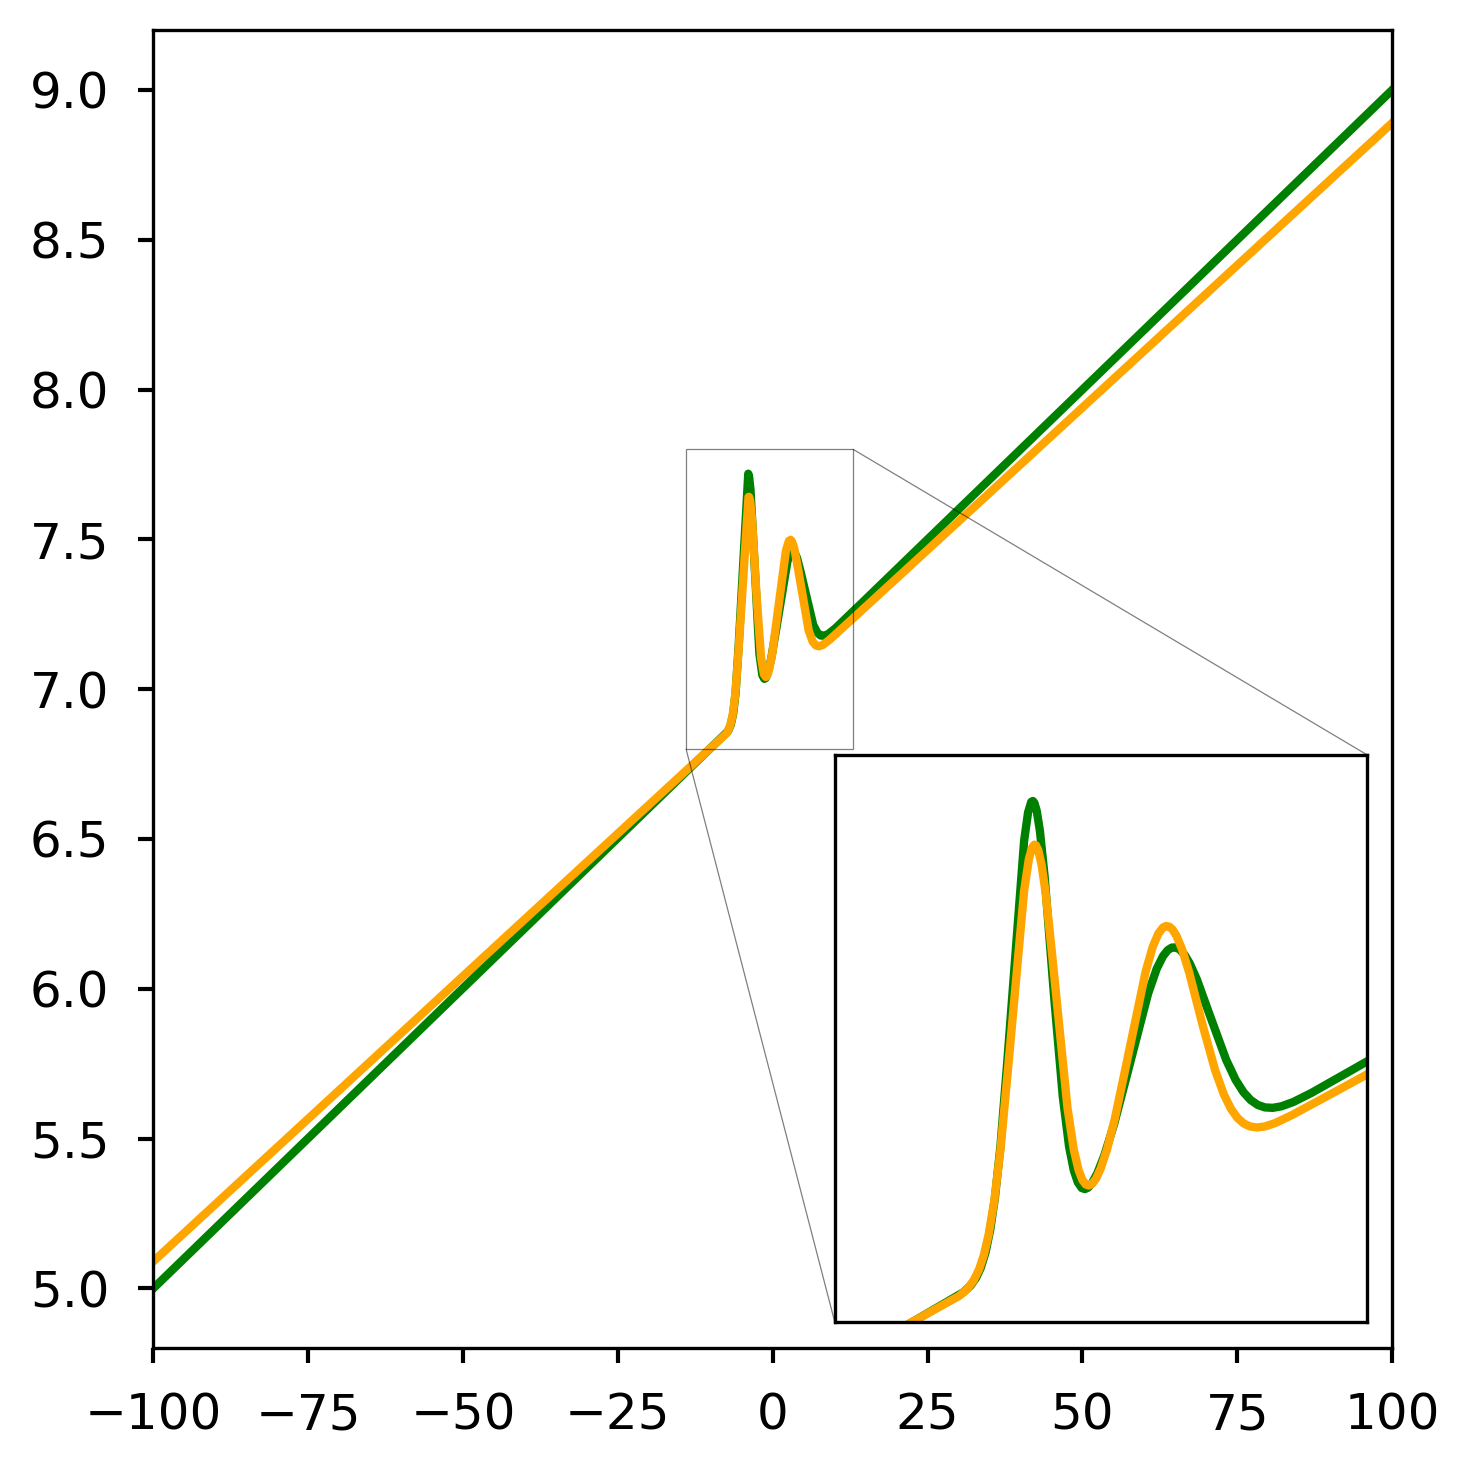

In [4]:
def plot_single_inset(axis):
    plot_original(axis)

    axin = axis.inset_axes([0.55, 0.02, 0.43, 0.43])

    plot_noisy_lines(axin)

    axin.set_xlim(-14, 13)
    axin.set_ylim(0.80+6, 1.8+6)

    axin.set_xticks([])
    axin.set_yticks([])

    axis.indicate_inset_zoom(axin, edgecolor="black")

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_single_inset(axis)
plt.tight_layout()